## Tarea semanal 15 
### Teoria de los circuitos 2 
#### Destefano Martin
Fecha de entrega: 3/11

Diseñe el cuadripolo A para que se comporte como:

- Filtro pasa bajos Chebyshev de 4to. orden, 1dB de ripple

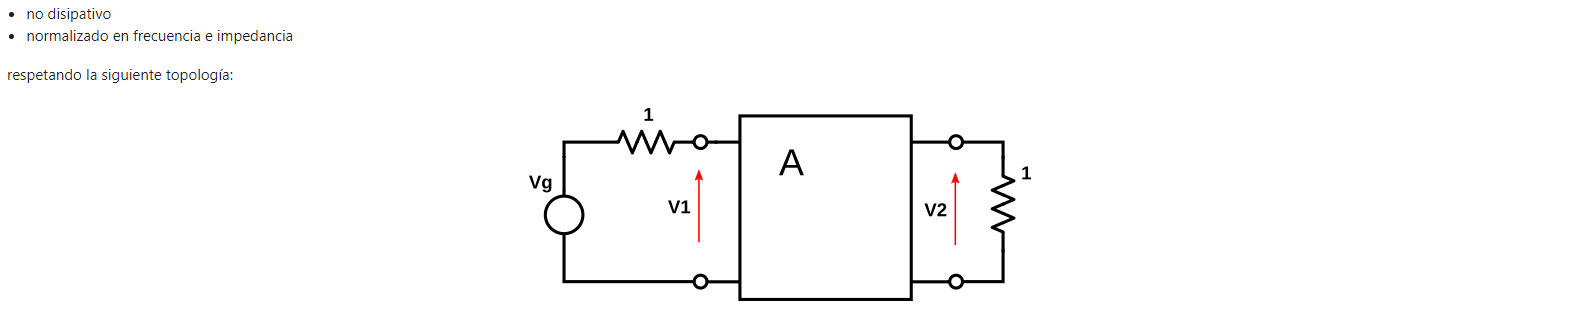
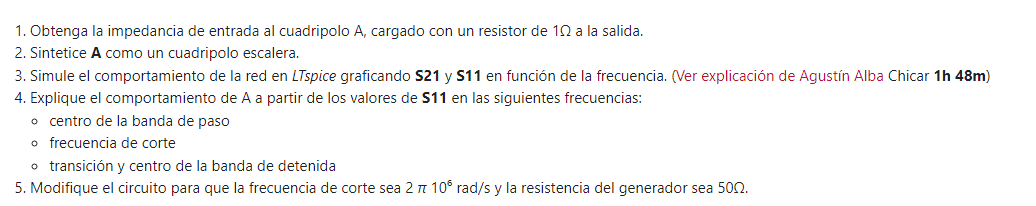

Comenzamos planteando el epsilon cuadrado y la transferencia de Chebyshev que va a ser igual a $|S_{21}|^2$

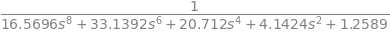

In [10]:
from sympy import * 
import numpy as np 

init_printing(use_unicode = True)
s = symbols('s', relational= True)


ee = 0.2589
S21_square_module = (1)/(ee*64*s**8+128*ee*s**6+80*ee*s**4+16*ee*s**2+ee+1)
simplify(S21_square_module)

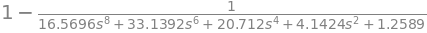

In [11]:
S11_square_module = 1 - S21_square_module 
S11_square_module


Para llevar esta expresion a la S11, hay que buscar las raices de denominador y numerador, luego, elegir las que se encuentren en el semiplano izquierdo. 



In [12]:
ee = 0.2589

roots_den = np.roots([ee*64,0,128*ee,0,80*ee,0,16*ee,0,ee+1])
roots_num = np.roots([ee*64,0,128*ee,0,80*ee,0,16*ee,0,ee])

print(roots_num)
print(roots_den)

[-1.94270044e-08+0.92387953j -1.94270044e-08-0.92387953j
  1.94270040e-08+0.92387953j  1.94270040e-08-0.92387953j
  6.54448737e-09+0.38268343j  6.54448737e-09-0.38268343j
 -6.54448762e-09+0.38268343j -6.54448762e-09-0.38268343j]
[-0.13954045+0.98338285j -0.13954045-0.98338285j  0.13954045+0.98338285j
  0.13954045-0.98338285j -0.33688045+0.40733051j -0.33688045-0.40733051j
  0.33688045+0.40733051j  0.33688045-0.40733051j]


In [13]:
import scipy.signal as sig

print("Vemos que las partes reales de los ceros de la funcion son despreciables, para nuestro estudio, valen cero.")

num, den = sig.zpk2tf([0.92387953j,-0.92387953j,0.38268343j,-0.38268343j],[-0.13954045+0.98338285j,-0.13954045-0.98338285j,-0.33688045+0.40733051j,-0.33688045-0.40733051j],1)

print(num)
print(den)

Vemos que las partes reales de los ceros de la funcion son despreciables, para nuestro estudio, valen cero.
[1.         0.         0.99999999 0.         0.125     ]
[1.         0.9528418  1.45395375 0.74265117 0.27563833]


S11: 


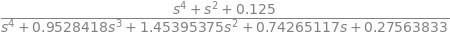

In [14]:
S11 = (s**4+1*s**2+0.125)/(s**4+0.9528418*s**3+1.45395375*s**2+0.74265117*s+0.27563833)

print("S11: ")
S11

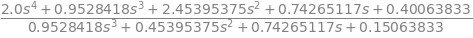

In [15]:
Z1 = (1+S11)/(1-S11)

simplify(Z1)

Si utilizamos el metodo de Cauer mediante division de polinomios: 

- L1: 2.098984325 

- C1: 1.0644605

- L2: 2.83104364

- C2: 0.789209287

- R: 2.65960419


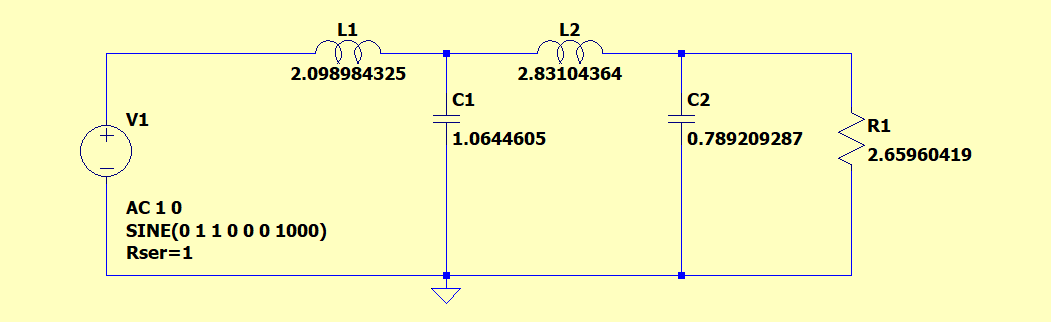
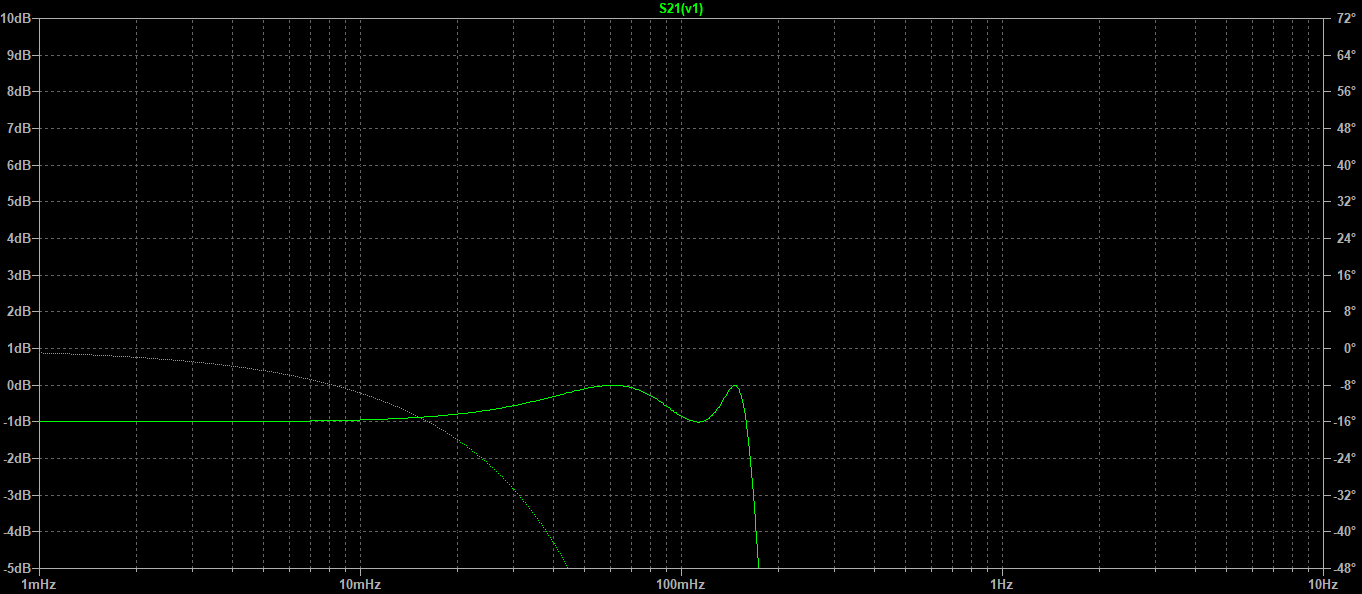
Vemos graficado S21, con los 4 toques correspondientes caracteristicos del Cheby y 1 dB de ripple. A continuacion graficamos S11: 

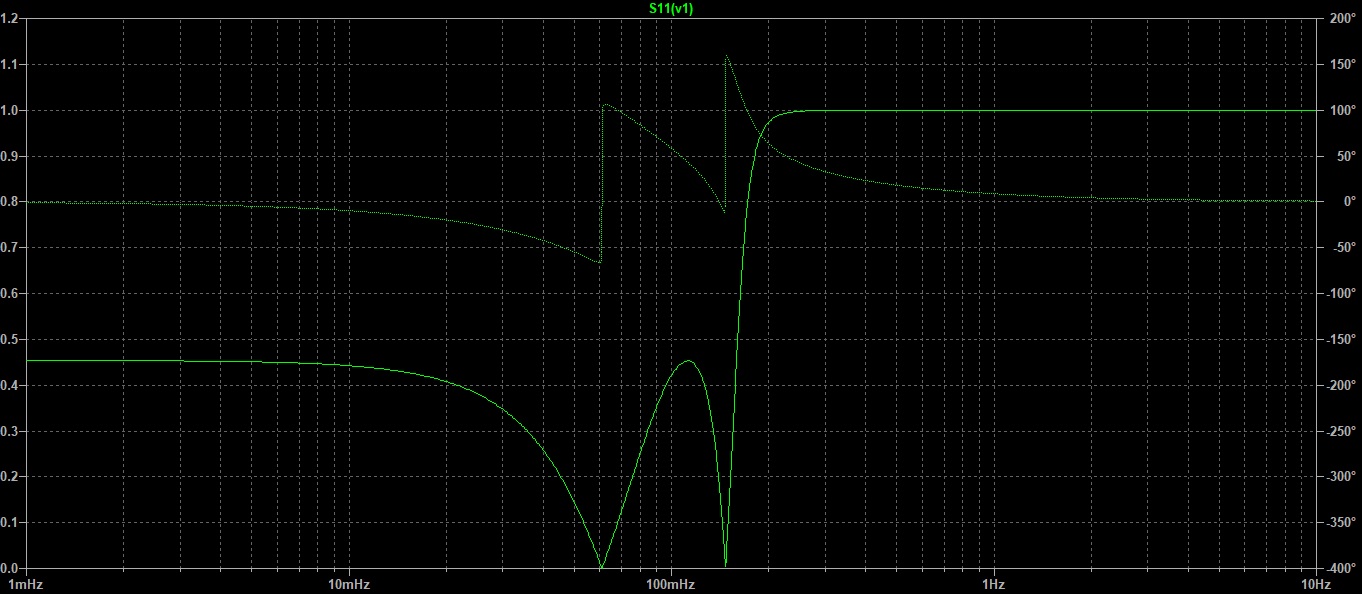

Como vemos S11, nunca esta totalmente adaptado con la excepcion de dos picos de adaptacion en dos frecuencias determinadas correspondiente a los ceros de la funcion S11: 


En 146.9mHz aproximadamente: 
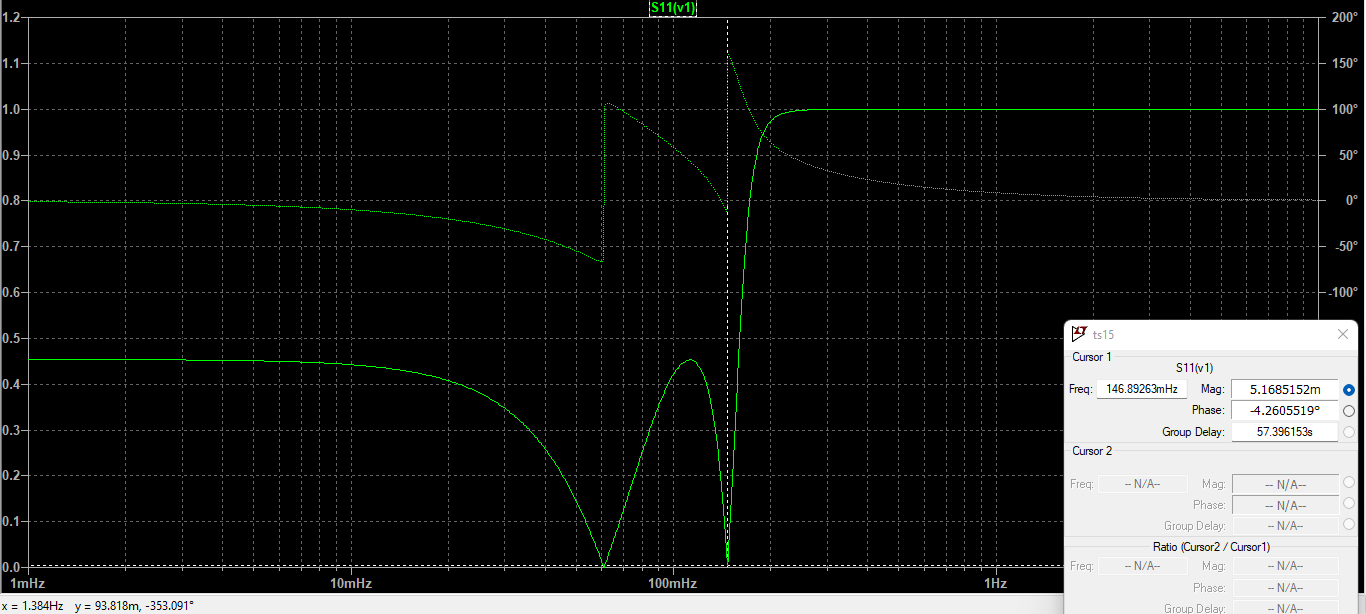

Y en 61mHz: 
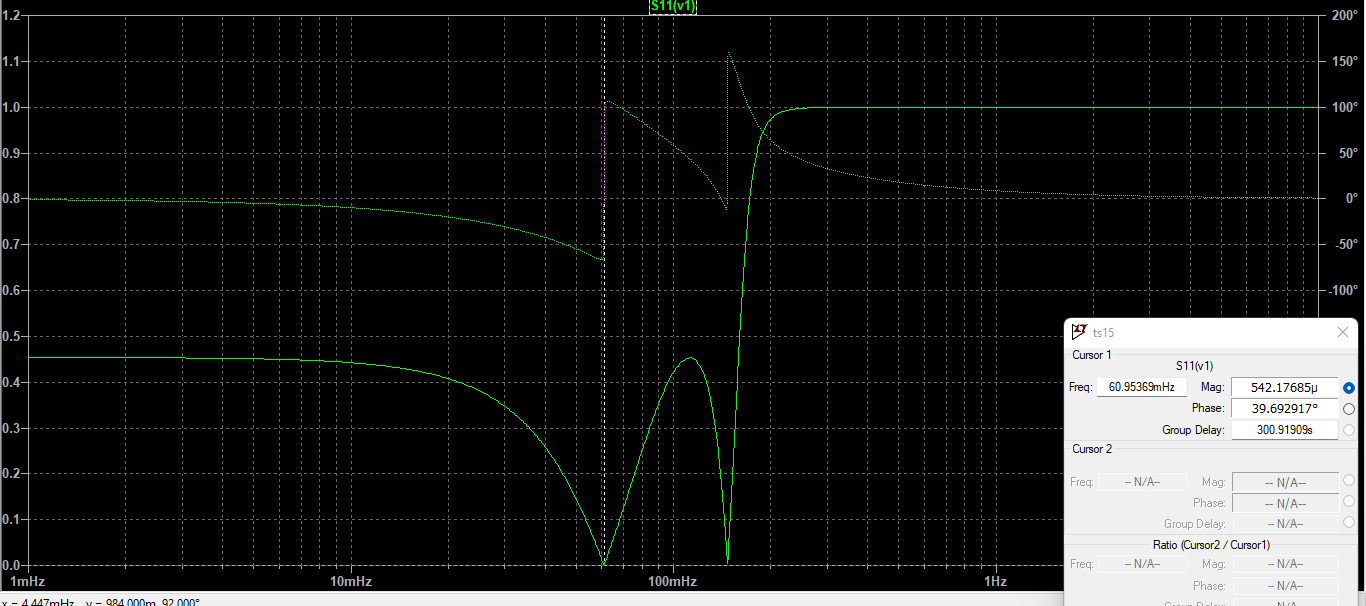

Entonces, para el centro de la banda de paso tenemos un coeficiente de reflexion de 0.45, lo que quiere decir que no tenemos adaptacion completa como vimos en otros ejemplos. Para la frecuencia de corte, el coeficiente vale lo mismo debido a los dos picos de adaptacion que nombramos anteriormente. Finalmente cuando nos adentramos en la banda de transcion y la de eliminacion vemos que tenemos desadaptacion total, o lo que tambien se denomina reflexion total de potencia. (S11 = 1)

Para S21 el estudio es diferente: 

Nuestro coeficiente de transmision en el centro de la banda de paso valdra 0.9, lo que significa que hay una transmision bastante elevada de la potencia pero no total, a medida que nos acercamos a la frecuencia de corte nos vamos encontrando que este coeficiente oscila entre 0.9 y 1, debido al ripple que se nos solicito. Para la frecuencia de corte comienza a disminuir de forma abrupta hasta llegar a que no tenemos transmision de potencia, comportamiento que se condice con el de S11, se produce la reflexion total sin transmision. 

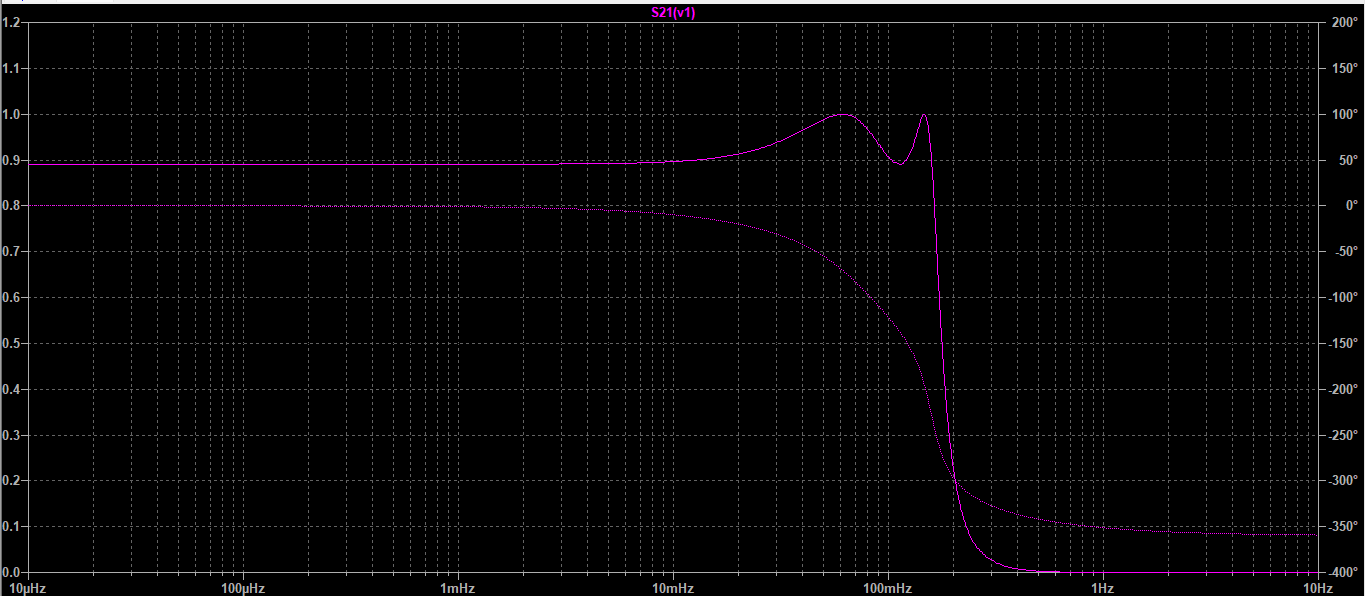

Para una ultima visualizacion, graficamos ambos parametros en un solo grafico: 

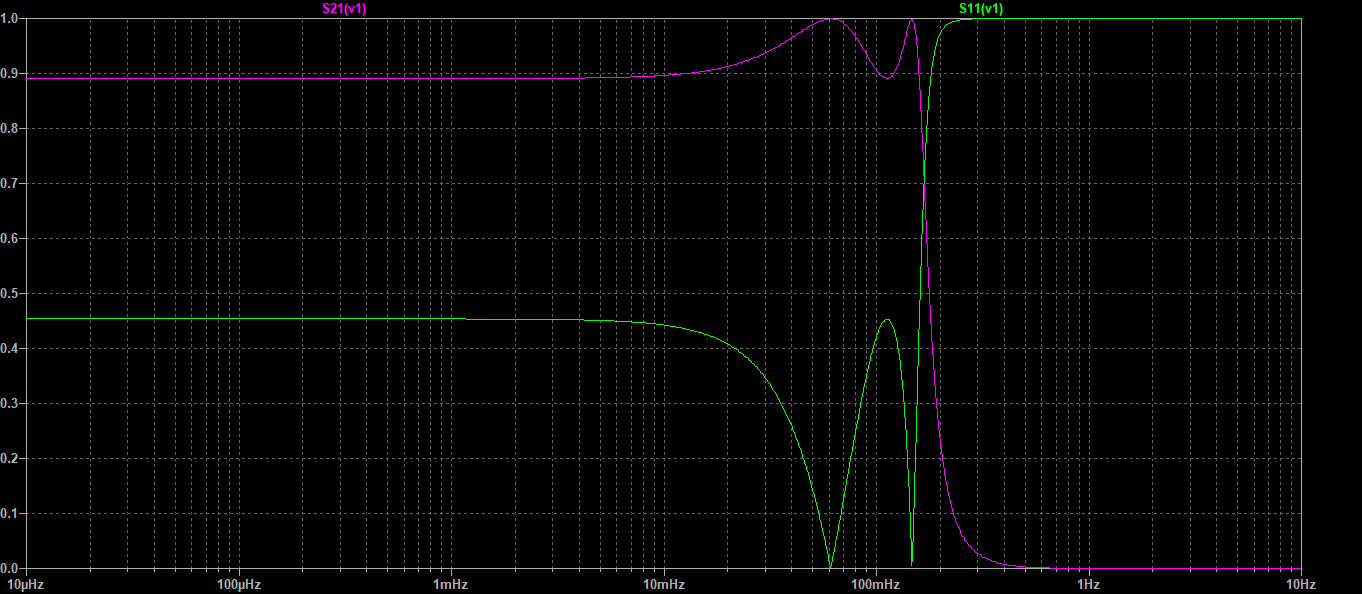


### Desnormalizacion de componentes

A continuacion desnormalizamos los componentes con las siguientes normas: 

$$ \Omega_{z} = 50\Omega $$ 
$$ \Omega_{w} = 2\pi10Mhz $$ 

In [16]:
import math as m

L1_prima = 2.098984325*50/(2*m.pi*10e6)

C1_prima =  1.0644605/(50*2*m.pi*10e6)

L2_prima = 2.83104364*50/(2*m.pi*10e6)

C2_prima =  0.789209287/(2*m.pi*10e6*50)

R_prima = 2.65960419*50

print("L1_prima: ", L1_prima)
print("C1_prima: ", C1_prima)
print("L2_prima: ", L2_prima)
print("C2_prima: ", C2_prima)
print("R_prima: ", R_prima)

L1_prima:  1.6703186539807768e-06
C1_prima:  3.3882830060214094e-10
L2_prima:  2.252872947074361e-06
C2_prima:  2.512131183201606e-10
R_prima:  132.9802095


A continuacion simulamos: 

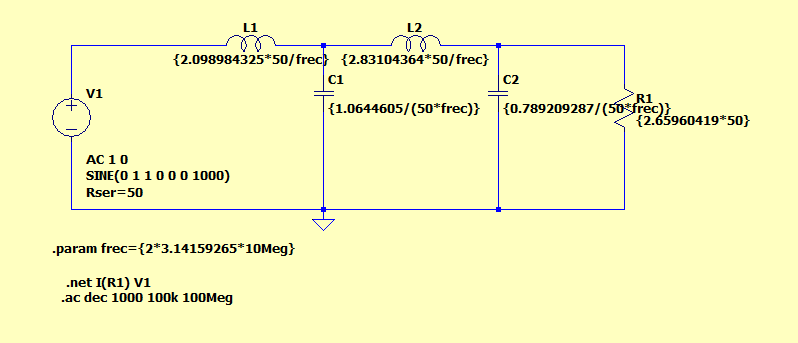

Podemos observar que la frecuencia de corte esta correctamente ubicada para el ripple solicitado.
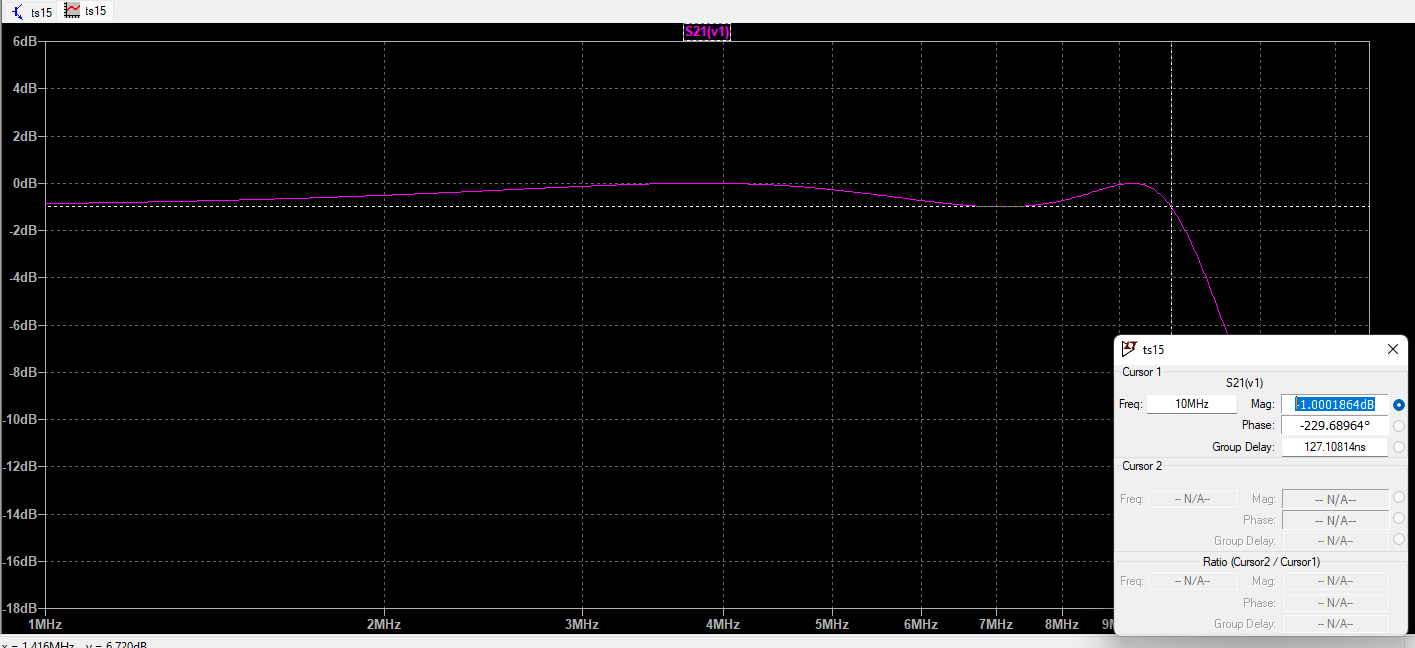